### <font color='yellow'>ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА</font>

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

План исследования:
1) Загрузка и обработка данных
2) Разведывательный анализ данных
    1. Визуальный анализ данных
    2. Статистический анализ данных
3) Ответ на бизнес-вопросы:
    - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
4) Дополнительное исследование
5) Финальный вывод по исследованию

#### Содержание датасета:

<table>
<tr style="background-color: #305C23"><td>НАИМЕНОВАНИЕ СТОЛБЦА</td><td>ОПИСАНИЕ</td><tr>
<tr><td>work_yeara</td><td>Год, в котором была выплачена зарплата.</td><tr>
<tr><td>experience_level</td><td>Опыт работы на этой должности в течение года со следующими возможными значениями: </br>
- EN — Entry-level/Junior;</br>
- MI — Mid-level/Intermediate;</br>
- SE — Senior-level/Expert;</br>
- EX — Executive-level/Director.</td><tr>
<tr><td>employment_type</td><td>Тип трудоустройства для этой роли:</br>
PT — неполный рабочий день;</br>
FT — полный рабочий день;</br>
CT — контракт;</br>
FL — фриланс.</td><tr>
<tr><td>job_title</td><td>Роль, в которой соискатель работал в течение года.</td><tr>
<tr><td>salary</td><td>Общая выплаченная валовая сумма заработной платы.</td><tr>
<tr><td>salary_currency</td><td>Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.</td><tr>
<tr><td>salary_in_usd</td><td>Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).</td><tr>
<tr><td>employee_residence</td><td>Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.</td><tr>
<tr><td>remote_ratio</td><td>Общий объём работы, выполняемой удалённо. Возможные значения:</br>
0 — удалённой работы нет (менее 20 %);</br>
50 — частично удалённая работа;</br>
100 — полностью удалённая работа (более 80 %).</td><tr>
<tr><td>company_location</td><td>Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.</td><tr>
<tr><td>company_size</td><td>Среднее количество людей, работавших в компании в течение года:</br>
S — менее 50 сотрудников (небольшая компания);</br>
M — от 50 до 250 сотрудников (средняя компания);</br>
L — более 250 сотрудников (крупная компания).</td><tr>

</table>

#### <font color='yellow'>1. Загрузка и обработка данных</font>



In [98]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import category_encoders as ce

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [143]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv', index_col='Unnamed: 0')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [145]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 42


In [146]:
# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Размер таблицы после удаления дубликатов: (565, 11)


In [147]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,5.650000e+02,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,359,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.000000,NaN,NaN


In [148]:
# кодируем опыт работы как порядковый признак
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'experience_level',
	'mapping': {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(data[['experience_level']])
data_bin = data_bin.rename(columns={'experience_level':'exp_level'})
# добавляем результат к исходному DataFrame
data = pd.concat([data, data_bin], axis=1)

In [149]:
# кодируем размер компании как порядковый признак
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'company_size',
	'mapping': {'S': 1, 'M': 2, 'L': 3}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(data[['company_size']])
data_bin = data_bin.rename(columns={'company_size':'comp_size'})
# добавляем результат к исходному DataFrame
data = pd.concat([data, data_bin], axis=1)

In [151]:
# удаляю исходные столбцы, которые были закодированы
data = data.drop(['experience_level', 'company_size'], axis=1)

In [152]:
data.describe(include='all')

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,exp_level,comp_size
count,565.000000,565,565,5.650000e+02,565,565.000000,565,565.000000,565,565.000000,565.000000
unique,NaN,4,50,NaN,17,NaN,57,NaN,50,NaN,NaN
top,NaN,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,NaN,NaN
freq,NaN,546,130,NaN,359,NaN,295,NaN,318,NaN,NaN
mean,2021.364602,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,69.911504,NaN,2.366372,2.196460
std,0.698138,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,40.900666,NaN,0.798004,0.670018
min,2020.000000,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.000000,NaN,1.000000,1.000000
25%,2021.000000,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,50.000000,NaN,2.000000,2.000000
50%,2021.000000,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,100.000000,NaN,2.000000,2.000000
75%,2022.000000,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.000000,NaN,3.000000,3.000000


In [153]:
# проверяю наполнение признака job_title для определения варианта его категоризации
data['job_title'].value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [154]:
# распределим признак job_title на 4 категории: Data Scientist, Data Engineer, Data Analyst, Other
def ds_typification(title):
    title = set(title.split(' '))
     
    for i in title:
        if i in ('Scientist', 'Science'):
            return ('Data Scientist') 
        elif i in ('Engineer', 'Engineering', 'Architect', 'ETL'):
            return ('Data Engineer') 
        elif i in ('Analyst', 'Analytics'):
            return ('Data Analyst')
    
    return ('Other')
        
    
data['job_type'] = data['job_title'].apply(ds_typification)
data['job_type'].value_counts()
    

job_type
Data Engineer     230
Data Scientist    211
Data Analyst      112
Other              12
Name: count, dtype: int64

<Axes: >

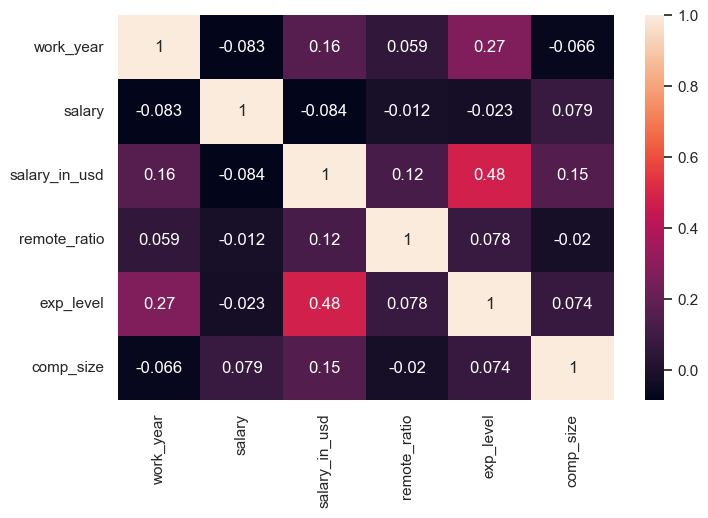

In [160]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data.corr(numeric_only=True), annot = True)

In [161]:
data.to_csv('ds_salaries_1.csv', index=False) 

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   work_year                565 non-null    int64
 1   salary_in_usd            565 non-null    int64
 2   remote_ratio             565 non-null    int64
 3   employment_type_FT       565 non-null    int64
 4   employment_type_CT       565 non-null    int64
 5   employment_type_PT       565 non-null    int64
 6   employment_type_FL       565 non-null    int64
 7   employee_residence_0     565 non-null    int64
 8   employee_residence_1     565 non-null    int64
 9   employee_residence_2     565 non-null    int64
 10  employee_residence_3     565 non-null    int64
 11  employee_residence_4     565 non-null    int64
 12  employee_residence_5     565 non-null    int64
 13  company_location_0       565 non-null    int64
 14  company_location_1       565 non-null    int64
 15  company_loc

Лирическое отступление</br>
Поначалу, я увлеклась преобразованием признаков и закодировала двоичным кодированием employee_residence и  company_location, а также через OneHotEncoding тип трудоустройства и свой новый признак job_type... но вчиталась в критерии оценки, где описана дальнейшая работа с категориальными признаками - пришлось всё отменить :)

<b>Вывод:</b> 

После преобразования расчитаны коэффициенты корреляции для количественных признаков и удалены коррелирующие признаки с коэффициентом выше $\pm$ 0.7:



In [95]:
data = data.drop(['employment_type_PT', 'employee_residence_2', 'employee_residence_3', 'employee_residence_5', ], axis=1)

<Axes: >

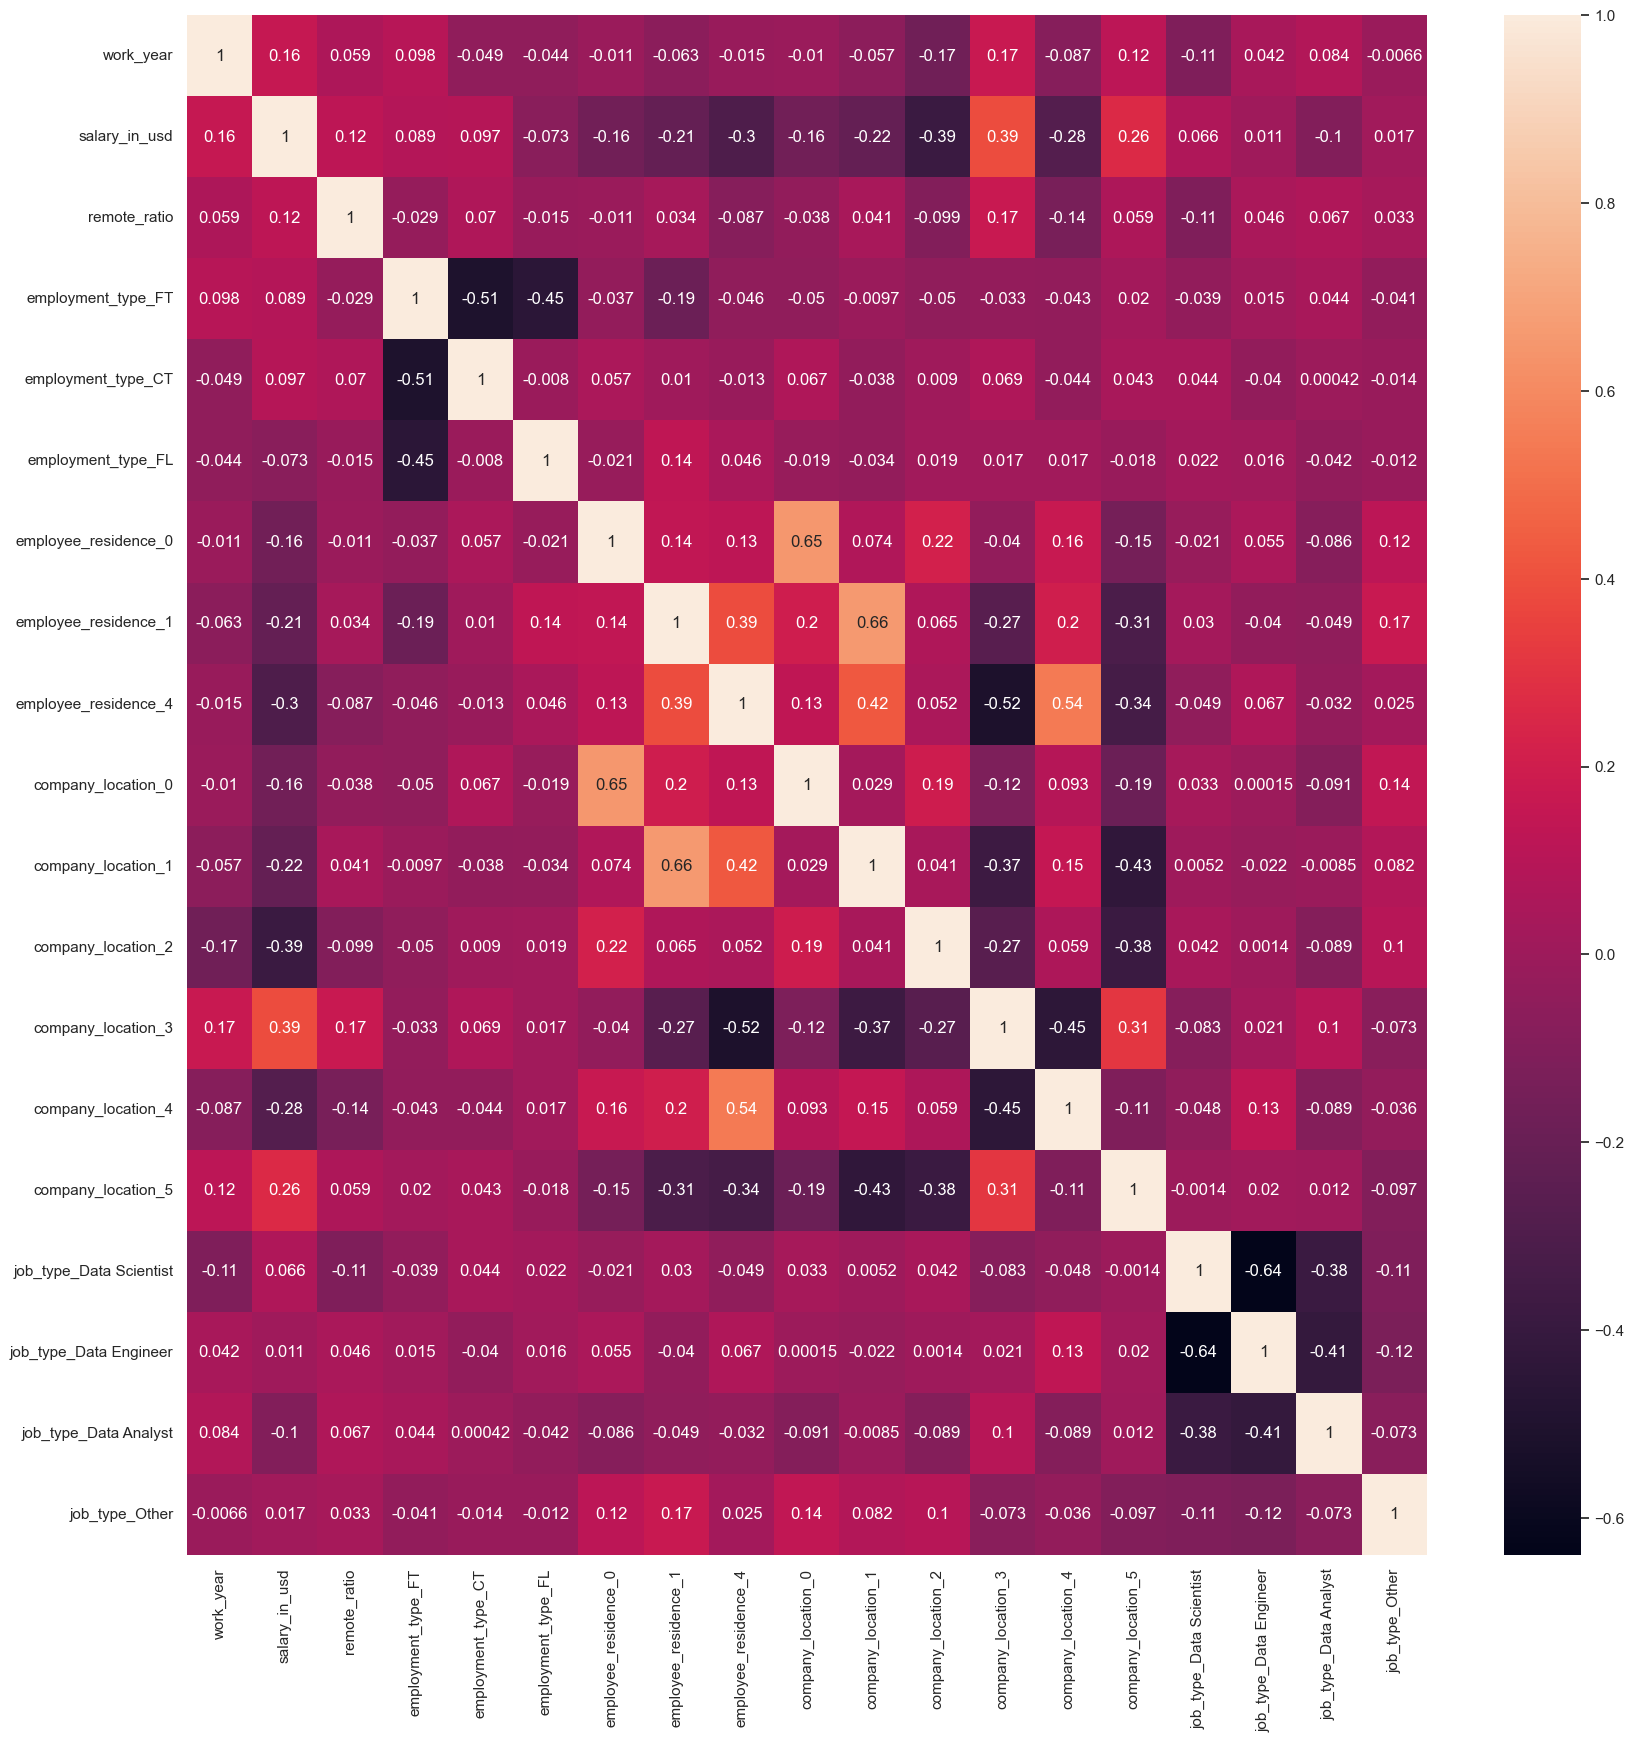

In [96]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(numeric_only=True), annot = True)

#### <font color='yellow'>2. Разведывательный анализ данных</font>

##### 2.1. Визуальный анализ данных

<b>Вывод:</b> </br>


##### 2.2. Статистический анализ данных

<b>Вывод:</b> </br>


#### <font color='yellow'>3. Ответ на бизнес-вопросы</font>

##### 3.1. Ежегодный рост зарплат

<b>Вывод:</b> </br>


##### 3.2. Зарплаты Data Scientist и Data Engineer

<b>Вывод:</b> </br>


##### 3.3. Ззарплаты специалистов Data Scientist в компаниях различных размеров

<b>Вывод:</b> </br>


##### 3.4. Связь между наличием должностей Data Scientist и Data Engineer и размером компании

<b>Вывод:</b> </br>


#### <font color='yellow'>4. Дополнительное исследование</font>

<b>Вывод:</b> </br>


#### <font color='yellow'>5. Финальный вывод по исследованию</font>

